In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv("scores.csv")

In [3]:
reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

FiveThirtyEight compiled this dataset to investigate if there was any bias to Fandango's ratings. In addition to aggregating ratings for films, Fandango is unique in that it also sells movie tickets, and so it has a direct commercial interest in showing higher ratings.

After discovering that a few films that weren't good were still rated highly on Fandango, the team investigated and published [an article about bias in movie ratings](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Here are the columns we'll be working with in this file:

* `FILM` - film name
* `RT_user_norm` - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
* `Metacritic_user_nom` - average user rating from Metacritic, normalized to a 1 to 5 point scale
* `IMDB_norm` - average user rating from IMDB, normalized to a 1 to 5 point scale
* `Fandango_Ratingvalue` - average user rating from Fandango, normalized to a 1 to 5 point scale
* `Fandango_Stars` - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)

Instead of displaying the raw rating, the writer discovered that Fandango usually rounded the average rating to the next highest half star (next highest 0.5 value). The `Fandango_Ratingvalue` column reflects the true average rating while the `Fandango_Stars` column reflects the displayed, rounded rating.

These sites use different scales for ratings. Some use a 5 star scale while others use a 100 point scale. In addition, **Metacritic** and **Rotten Tomatoes** aggregate scores from both **users** and **film critics**, while **IMDB** and **Fandango** aggregate only from their **users**. 

We'll focus on just the average scores from `users`, because not all of the sites have scores from `critics`.

The `RT_user_norm`, `Metacritic_user_nom`, `IMDB_norm`, and `Fandango_Ratingvalue` columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie

In [5]:
reviews.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [18]:
norm_reviews = reviews[['FILM', 'RT_user_norm', 'Metacritic_user_nom','IMDB_norm',
                        'Fandango_Ratingvalue', 'Fandango_Stars']]

In [19]:
norm_reviews.head(1)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


In [9]:
import numpy as np

In [20]:
x_b_p = np.arange(5) + 0.75 # SIMD 
x_b_p

array([0.75, 1.75, 2.75, 3.75, 4.75])

In [21]:
h = norm_reviews.iloc[0,1:].values
h

array([4.3, 3.55, 3.9, 4.5, 5.0], dtype=object)

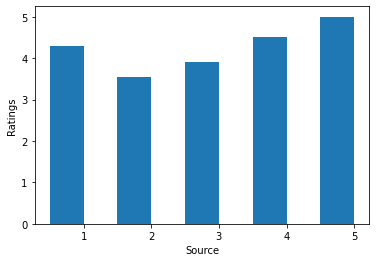

In [23]:
plt.bar(x_b_p, h,0.5)
plt.xlabel("Source")
plt.ylabel("Ratings")
plt.show()

In [24]:
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)

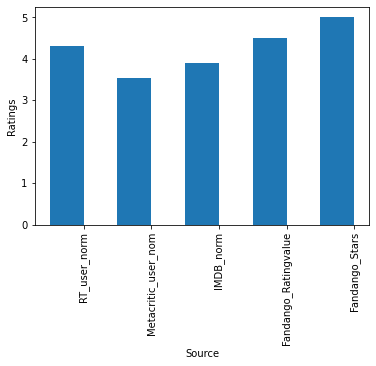

In [34]:
fig, ax = plt.subplots()
ax.bar(x_b_p, h, 0.5)
ax.set_xticks(range(1,6))
ax.set_xticklabels(norm_reviews.iloc[0,1:].index, rotation = 90)
ax.set_xlabel("Source")
plt.ylabel("Ratings")

plt.show()

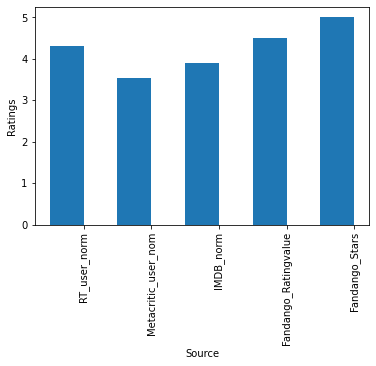

In [36]:
plt.bar(x_b_p, h, 0.5)
plt.xticks(range(1,6), norm_reviews.iloc[0,1:].index, rotation = 90)
# plt.xticklabels(norm_reviews.iloc[0,1:].index, rotation = 90) ----errotic line
plt.xlabel("Source")
plt.ylabel("Ratings")

plt.show()

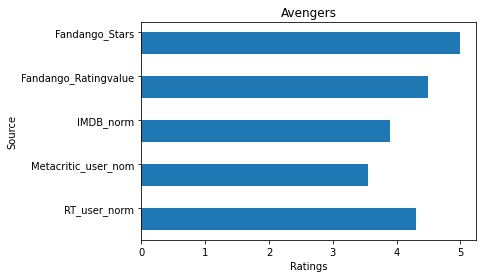

In [39]:
fig, ax = plt.subplots()
ax.barh(x_b_p, h, 0.5)
ax.set_yticks(range(1,6))
ax.set_yticklabels(norm_reviews.iloc[0,1:].index, rotation = 0)
ax.set_ylabel("Source")
plt.xlabel("Ratings")
ax.set_title("Avengers")

plt.show()

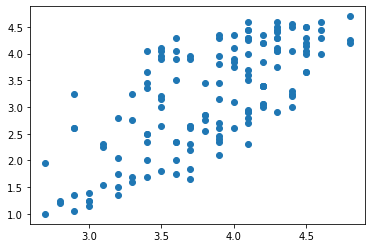

In [40]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
plt.show()

In [41]:
norm_reviews["Fandango_Ratingvalue"].corr(norm_reviews["RT_user_norm"])

0.7243289942493156

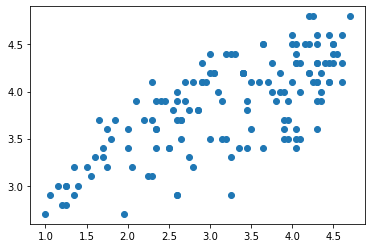

In [42]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews["RT_user_norm"], norm_reviews["Fandango_Ratingvalue"])
plt.show()

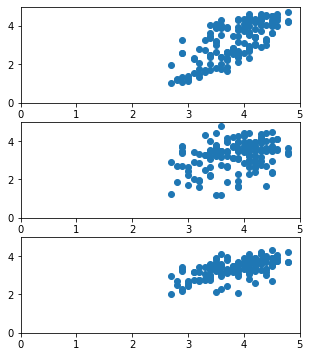

In [46]:
fig = plt.figure(figsize = (5,6))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"],norm_reviews["RT_user_norm"])
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(norm_reviews["Fandango_Ratingvalue"],norm_reviews["Metacritic_user_nom"])
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews["Fandango_Ratingvalue"],norm_reviews["IMDB_norm"])
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)

plt.show()

In [48]:
norm_reviews["Fandango_Ratingvalue"].corr(norm_reviews["IMDB_norm"])

0.6003541772626366

In [49]:
norm_reviews["Fandango_Ratingvalue"].corr(norm_reviews["Metacritic_user_nom"])

0.3369453142649485

In [50]:
norm_reviews["Fandango_Ratingvalue"].mean()

3.8452054794520483

In [51]:
norm_reviews["IMDB_norm"].mean()

3.3684931506849316

In [52]:
norm_reviews["Metacritic_user_nom"].mean()

3.2595890410958885

In [53]:
norm_reviews["RT_user_norm"].mean()

3.1938356164383572